# Linear SVC

In [1]:
# Import libraries
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

SEED = 0

In [2]:
# Load dataset
df = pd.read_csv('Social_Network_Ads.csv')

print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [3]:
from sklearn.model_selection import train_test_split

x = df.drop('Purchased', axis=1)
y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=SEED)

In [4]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [5]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1]


In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) * 100

print(f'Model Accuracy: {accuracy}%')

Model Accuracy: 82.5%


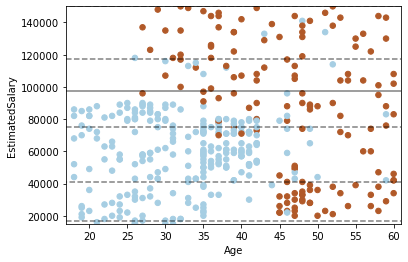

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    x,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()
